Now we can discus dynamics.

We will use an example of a driven cavity in which we might have some decay.

This time we need the entire package, including solvers for equations of dynamics.

In [1]:
using QuantumOptics

The system will be a single-mode cavity, to good approximation a harmonic oscillator

In [2]:
cutoff = 64
B = FockBasis(cutoff)

ω = 1.0
n = number(B)
H₀ = ω * n
α = 4.0*exp(im*π/3)
ψ₀ = coherentstate(B, α)
a = destroy(B)
p = a+a' # TODO position and momentum operator
q = im*(a'-a)

Operator(dim=65x65)
  basis: Fock(cutoff=64)
⎡⠪⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠪⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠪⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠪⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠪⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡢⡀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡢⡀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡢⡀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡢⡀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⎦

# Unitary dynamics

In [3]:
ts = 0:0.01:3*2π
_, ψs = timeevolution.schroedinger(ts,ψ₀,H₀);

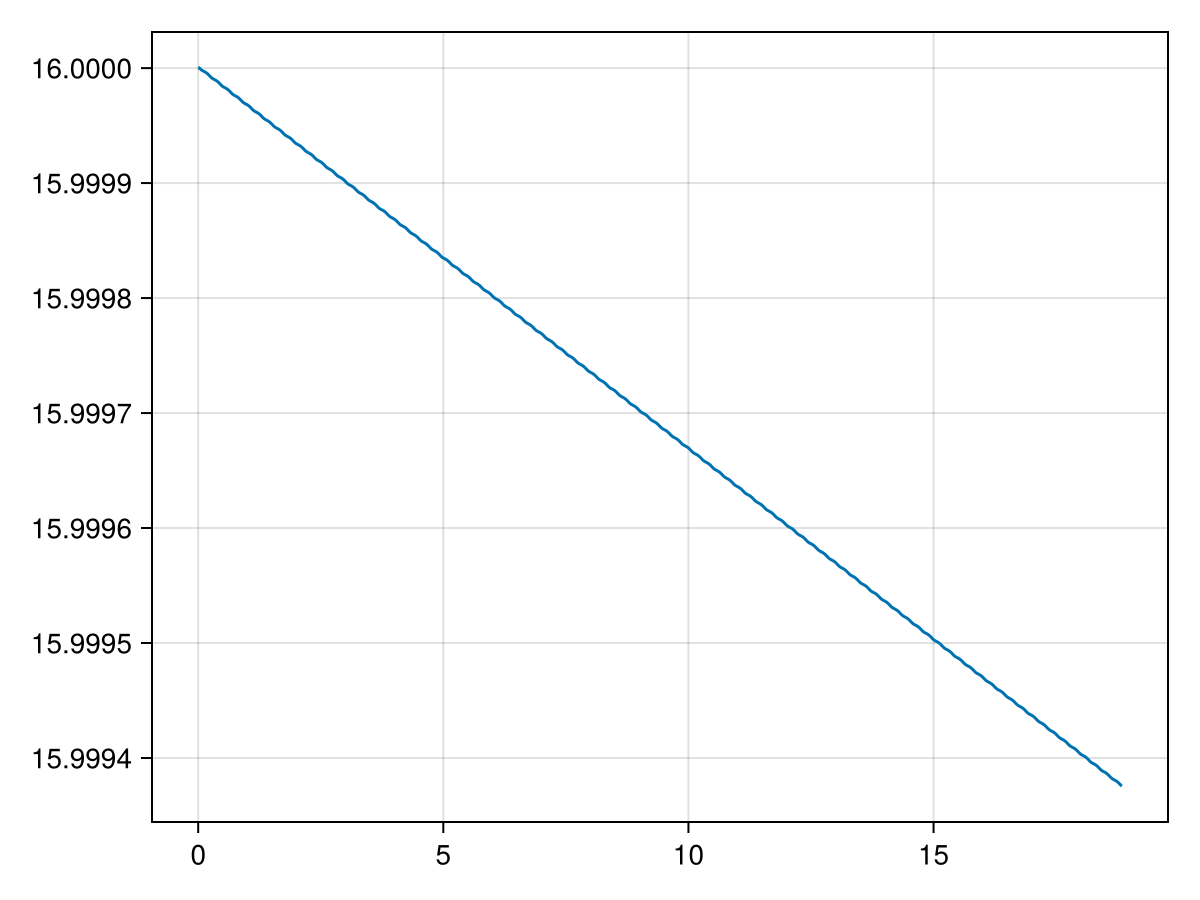

In [4]:
using CairoMakie

lines(ts, real.(expect.((n,), ψs)))
current_figure()

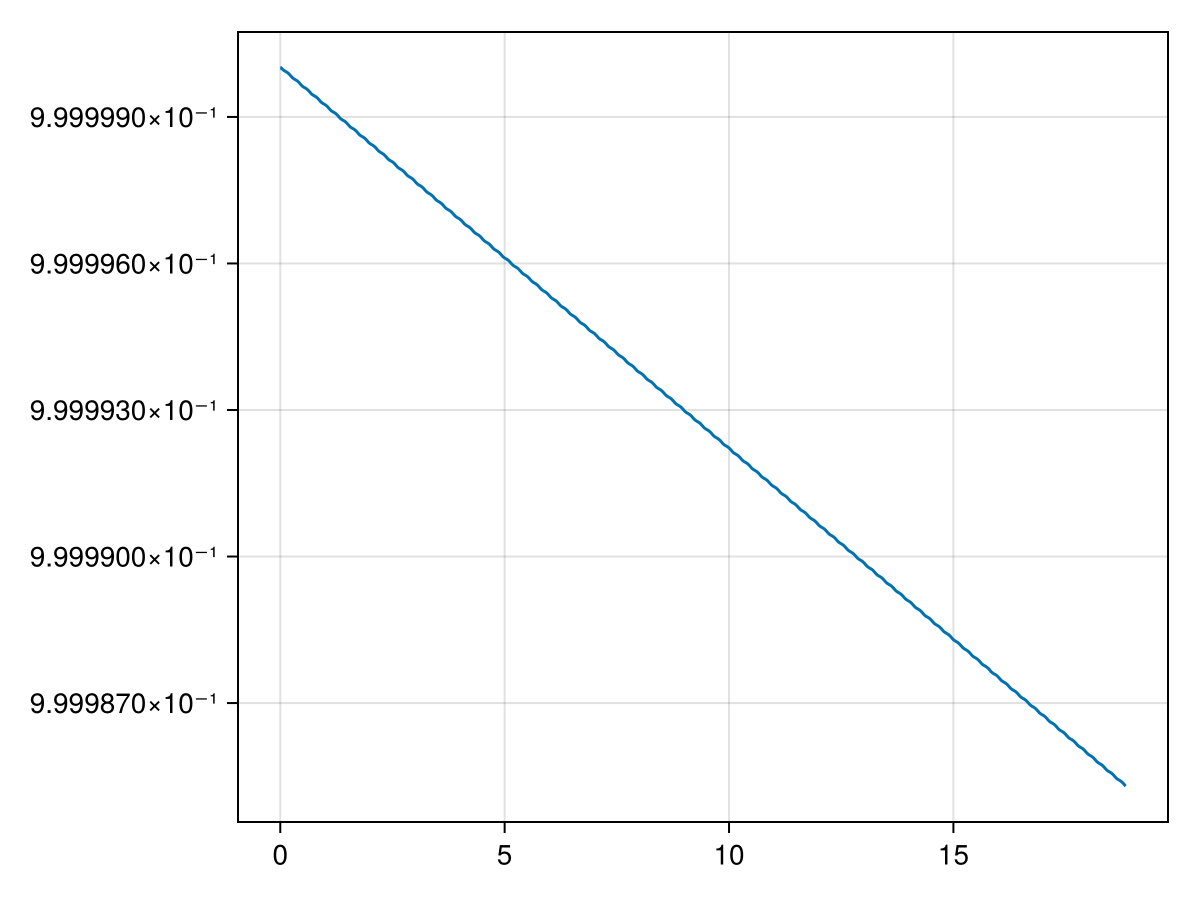

In [5]:
lines(ts, norm.(ψs))
current_figure()

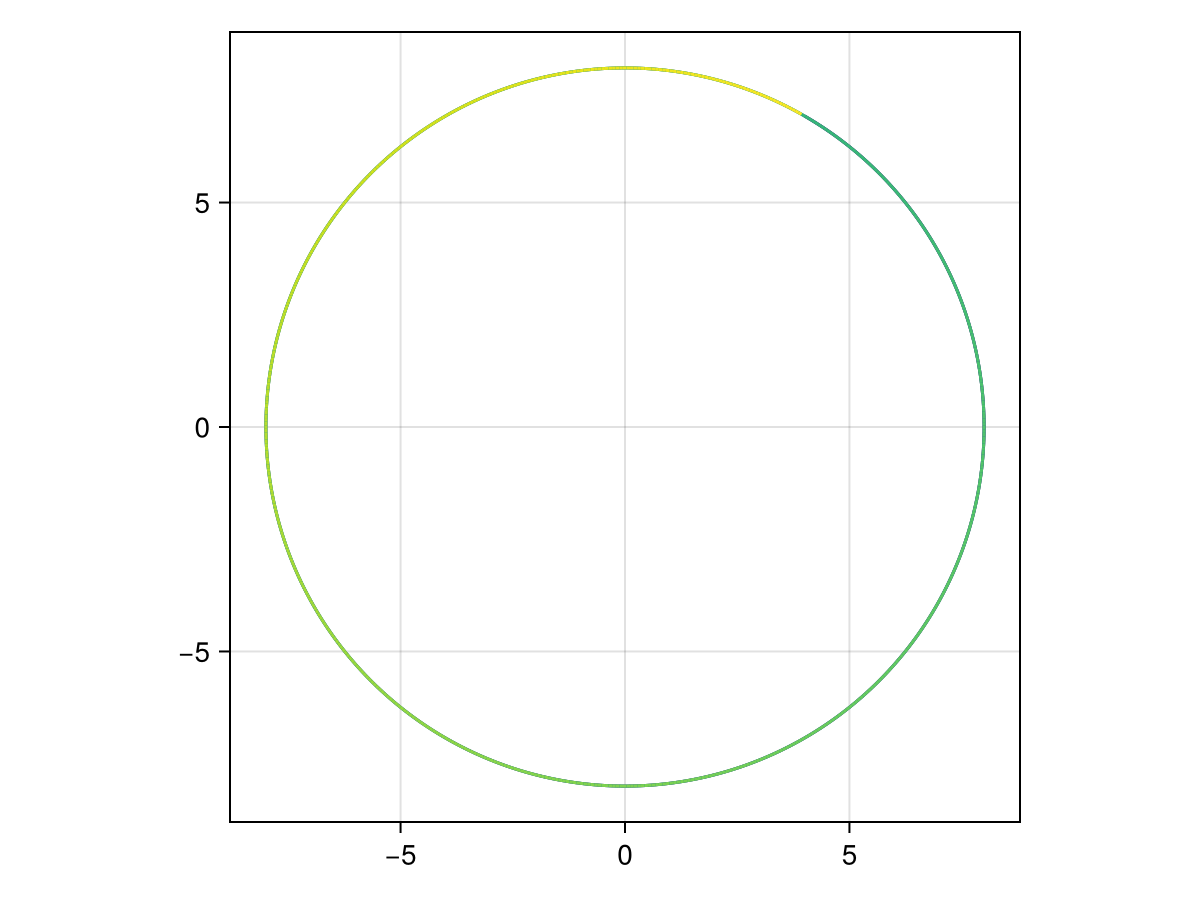

In [6]:
f = Figure()
Axis(f[1,1], aspect=DataAspect())
lines!(real.(expect.((p,), ψs)), real.(expect.((q,), ψs)), color=ts)
current_figure()

## Time-dependent drives

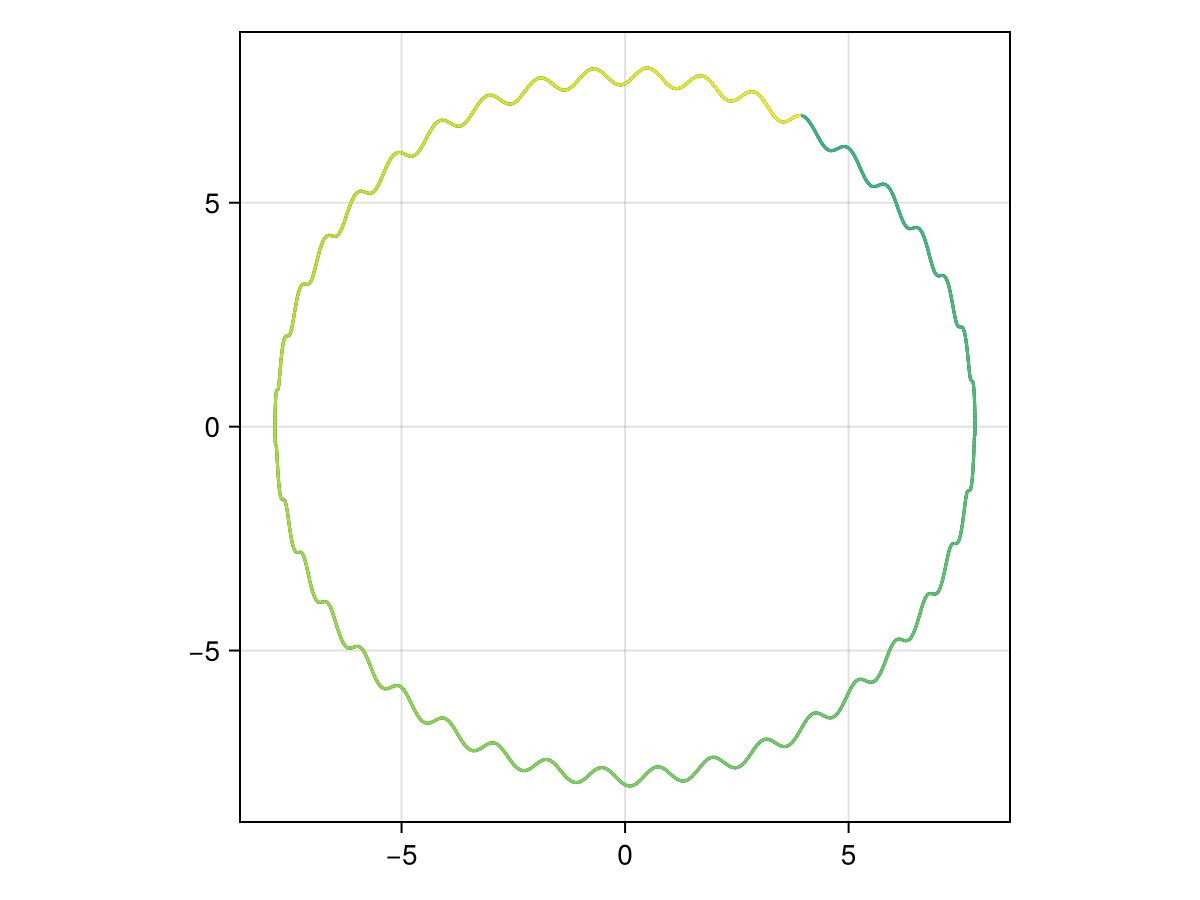

In [7]:
function Hdynamic(t, psi)
    H₀ + 4*sin(40ω*t)*p
end

_, ψs = timeevolution.schroedinger_dynamic(ts,ψ₀,Hdynamic;)

f = Figure()
Axis(f[1,1], aspect=DataAspect())
lines!(real.(expect.((p,), ψs)), real.(expect.((q,), ψs)), color=ts)
current_figure()

This is pretty darn slow though, as it recreates temporary objects for each step of the solver.

In [8]:
using BenchmarkTools
@benchmark _, ψs = timeevolution.schroedinger_dynamic(ts,ψ₀,Hdynamic;)

BenchmarkTools.Trial: 85 samples with 1 evaluation per sample.
 Range (min … max):  44.078 ms … 205.546 ms  ┊ GC (min … max):  0.00% … 75.83%
 Time  (median):     57.304 ms               ┊ GC (median):    25.24%
 Time  (mean ± σ):   59.383 ms ±  16.652 ms  ┊ GC (mean ± σ):  26.15% ±  9.60%

                        ▄▄█ ▄▂                                  
  ▃▁▃▁▃▁▁▃▃▁▁▁▁▁▁▁▁▃▃▄▃▇██████▆▁▁▄▃▃▃▁▃▁▁▁▃▄▁▃▁▁▁▁▃▁▁▁▁▁▁▁▁▁▁▃ ▁
  44.1 ms         Histogram: frequency by time         76.2 ms <

 Memory estimate: 158.90 MiB, allocs estimate: 350861.

## "Lazy" ops

In [9]:
Hlazy = H₀ + TimeDependentSum(t->4*sin(40ω*t), p)
@benchmark _, ψs = timeevolution.schroedinger_dynamic(ts,ψ₀,Hlazy;)

BenchmarkTools.Trial: 252 samples with 1 evaluation per sample.
 Range (min … max):  18.385 ms … 45.756 ms  ┊ GC (min … max): 0.00% … 59.01%
 Time  (median):     19.601 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   19.905 ms ±  2.504 ms  ┊ GC (mean ± σ):  2.06% ±  6.65%

  █▁    ▃▂▁                                                    
  ██▇▅▆████▄▄▄▄▄▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▃▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂ ▃
  18.4 ms         Histogram: frequency by time        30.5 ms <

 Memory estimate: 5.77 MiB, allocs estimate: 149567.

TODO more examples of lazy operators that are not just about time-dependence
TODO example of multiple dispatch by creating your own Lazy operator

# Accuracy and Precision

Let's make a very "oscillatory" drive, to make the solver sweat a bit.

In [10]:
Hlazy = H₀ + TimeDependentSum(t->40*sin(4000ω*t), p)
ts = 0:1.0:10
_, ψs = timeevolution.schroedinger_dynamic(ts,ψ₀,Hlazy;);

the result should be normalized

In [11]:
ψs[end] |> norm

1.0012402075715567

we can try a few different solvers

In [12]:
using OrdinaryDiffEqLowOrderRK: DP5
using OrdinaryDiffEqTsit5: Tsit5
using OrdinaryDiffEqVerner: Vern8

In [13]:
@time _, ψs = timeevolution.schroedinger_dynamic(ts,ψ₀,Hlazy;);
@time _, ψs = timeevolution.schroedinger_dynamic(ts,ψ₀,Hlazy;);
norm(ψs[end])

  0.233039 seconds (1.89 M allocations: 46.122 MiB)
  0.242607 seconds (1.89 M allocations: 46.122 MiB)


1.0012402075715567

In [14]:
@time _, ψs = timeevolution.schroedinger_dynamic(ts,ψ₀,Hlazy; alg=Tsit5());
@time _, ψs = timeevolution.schroedinger_dynamic(ts,ψ₀,Hlazy; alg=Tsit5());
norm(ψs[end])

  0.382410 seconds (2.65 M allocations: 66.609 MiB, 6.80% gc time, 9.01% compilation time)
  0.313006 seconds (2.58 M allocations: 63.111 MiB)


1.0004518506009754

In [15]:
@time _, ψs = timeevolution.schroedinger_dynamic(ts,ψ₀,Hlazy; alg=Vern8());
@time _, ψs = timeevolution.schroedinger_dynamic(ts,ψ₀,Hlazy; alg=Vern8());
norm(ψs[end])

  0.308411 seconds (2.01 M allocations: 51.142 MiB, 7.45% gc time, 11.42% compilation time)
  0.241678 seconds (1.94 M allocations: 47.574 MiB)


1.0001907402761503

In [16]:
@time _, ψs = timeevolution.schroedinger_dynamic(ts,ψ₀,Hlazy; alg=Vern8(), reltol=0, abstol=1e-12);
@time _, ψs = timeevolution.schroedinger_dynamic(ts,ψ₀,Hlazy; alg=Vern8(), reltol=0, abstol=1e-12);
norm(ψs[end])

  1.374363 seconds (10.49 M allocations: 259.629 MiB, 2.72% gc time, 3.71% compilation time)
  1.313880 seconds (10.37 M allocations: 253.258 MiB, 1.43% gc time)


0.9999999996931036

Helpful discussion on choosing a good solver, with plently of links to more resources can be found on [the julia discourse forum](https://discourse.julialang.org/t/setting-abstol-and-reltol-when-solving-the-schrodinger-equation-with-ordinarydiffeq/125534).

# Non-unitary dynamics with the Lindblad master equation

In [17]:
ts = 0:0.01:3*2π
_, ρs = timeevolution.master(ts,ψ₀,H₀,[√0.1 * a]);

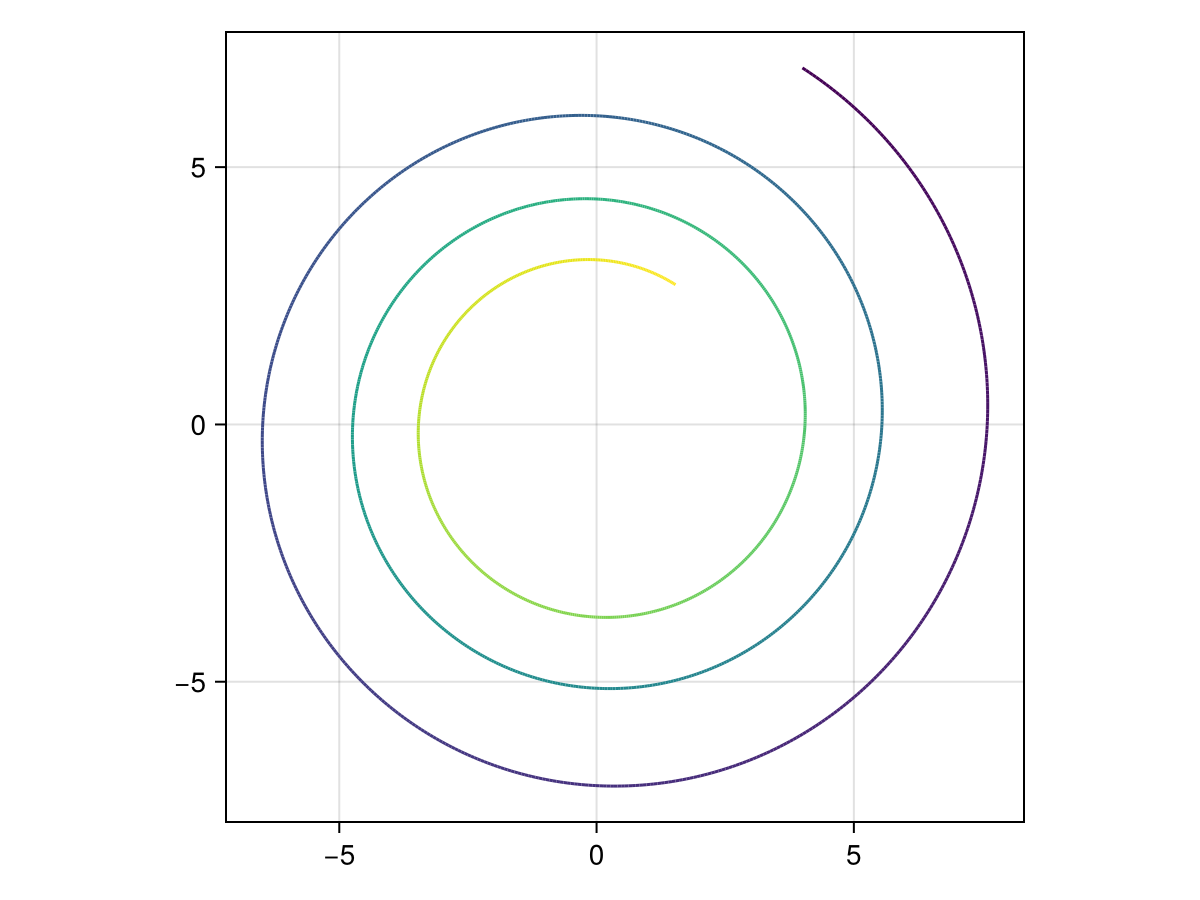

In [18]:
f = Figure()
Axis(f[1,1], aspect=DataAspect())
lines!(real.(expect.((p,), ρs)), real.(expect.((q,), ρs)), color=ts)
current_figure()

TODO unhelpful error message if J is not is not a vector (but rather just an operator) in _, ρs = timeevolution.master(ts,ψ₀,H₀,a)
TODO the docs mark these as internal
TODO Lazy time dependent ops with master_dynamic

# Non-unitary dynamics with Monte Carlo Trajectories

In [19]:
ts = 0:0.01:3*2π
_, ψs = timeevolution.mcwf(ts,ψ₀,H₀,[√0.1 * a]);

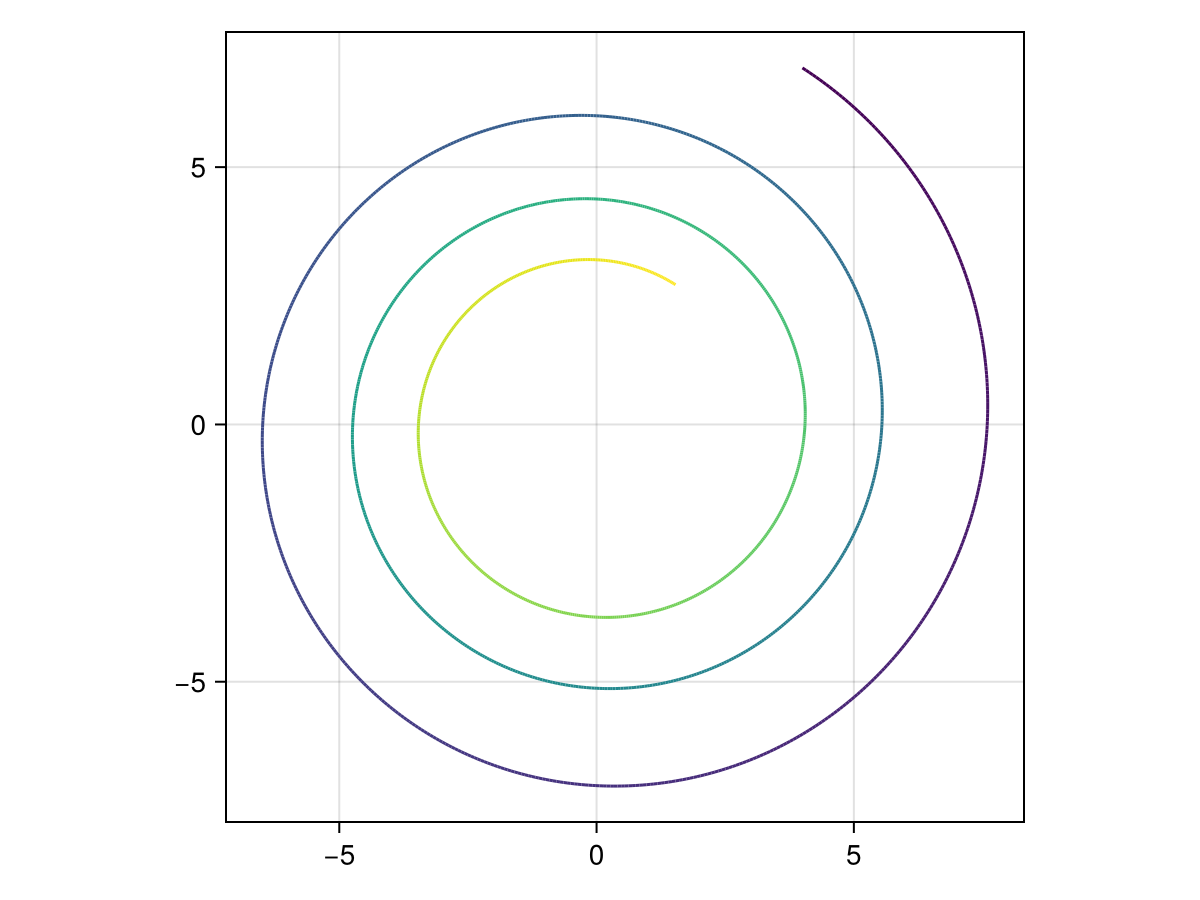

In [20]:
f = Figure()
Axis(f[1,1], aspect=DataAspect())
lines!(real.(expect.((p,), ψs)), real.(expect.((q,), ψs)), color=ts)
current_figure()

To really see something interesting with the MC trajectories we want non-Gaussian dynamics

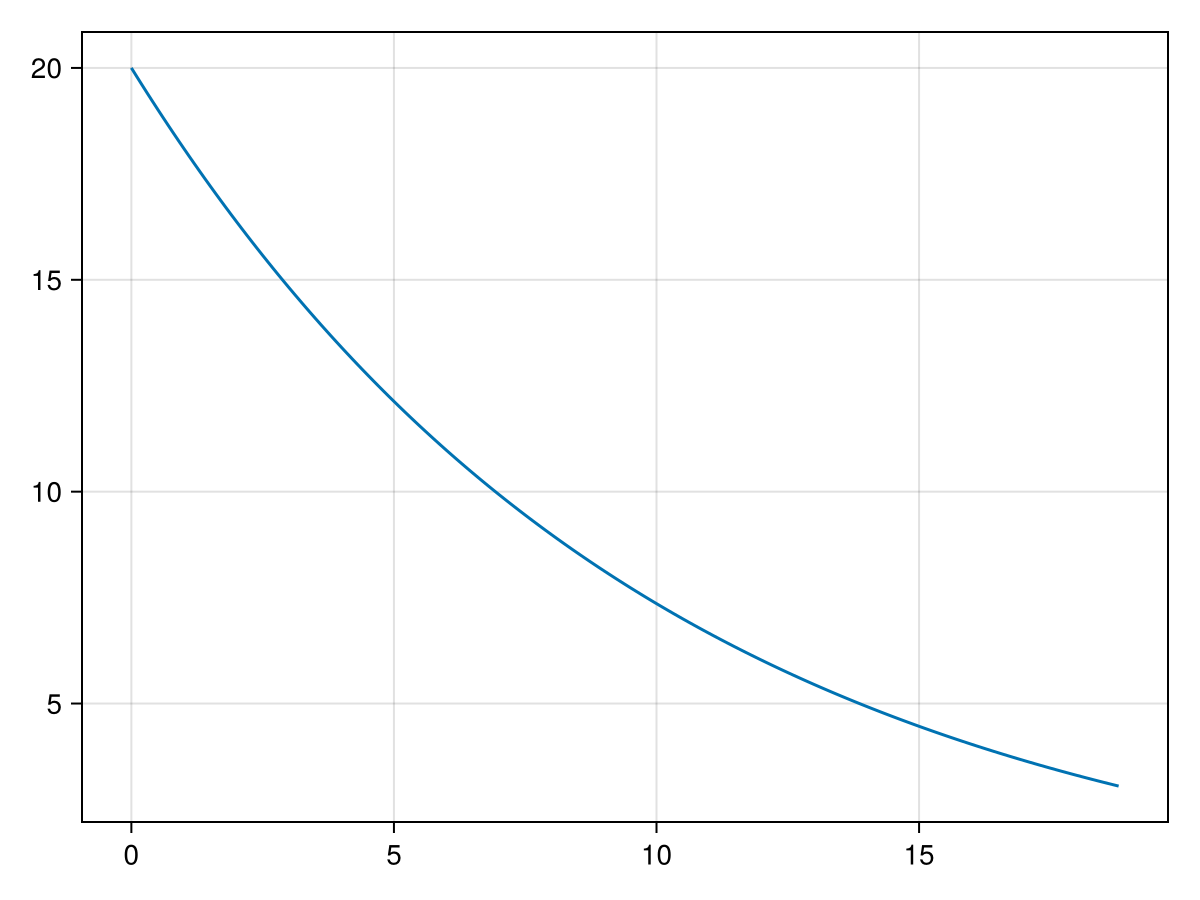

In [21]:
ts = 0:0.1:3*2π
ψ₀ = fockstate(B,20)
_, ρs = timeevolution.master(ts,ψ₀,H₀,[√0.1 * a]);

lines(ts, real.(expect.((n,), ρs)))

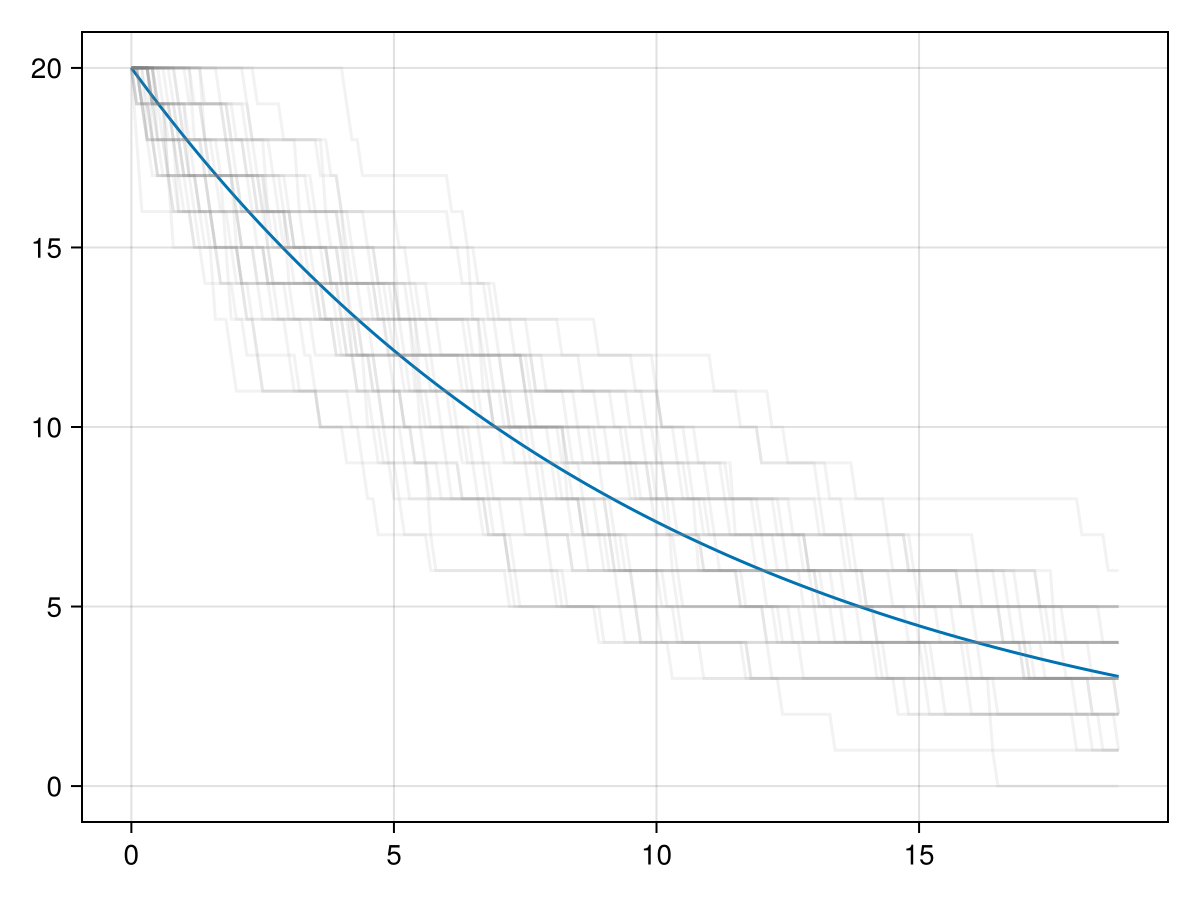

In [22]:
sols = []
for i in 1:40
    _, ψs = timeevolution.mcwf(ts,ψ₀,H₀,[√0.1 * a]);
    push!(sols, ψs)
    lines!(ts, real.(expect.((n,), ψs)), color=(:gray,0.1))
end
current_figure()

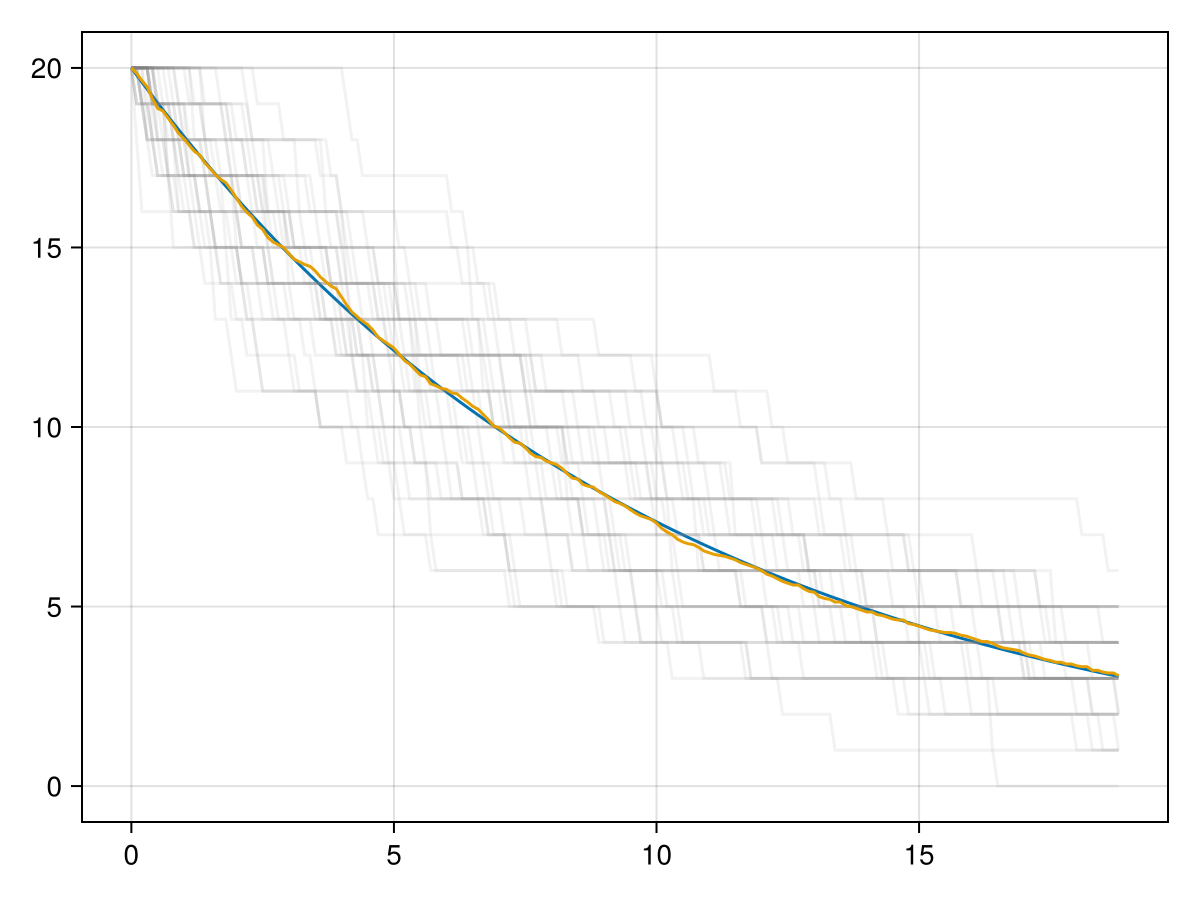

In [23]:
sols_avg = sum([dm.(psis) for psis in sols])/length(sols)
lines!(ts, real.(expect.((n,), sols_avg)))
current_figure()

## Extracting more from a single trajectory

There is an even more efficient way to think of this, as a way to have rigorous low bounds on performance.

We will use a more realistic example, a bosonic code in which we perform some logical unitary.

In [24]:
α = 4.0
l0 = (coherentstate(B, α) + coherentstate(B, -α))/√2
l1 = (coherentstate(B, im*α) + coherentstate(B, -im*α))/√2;

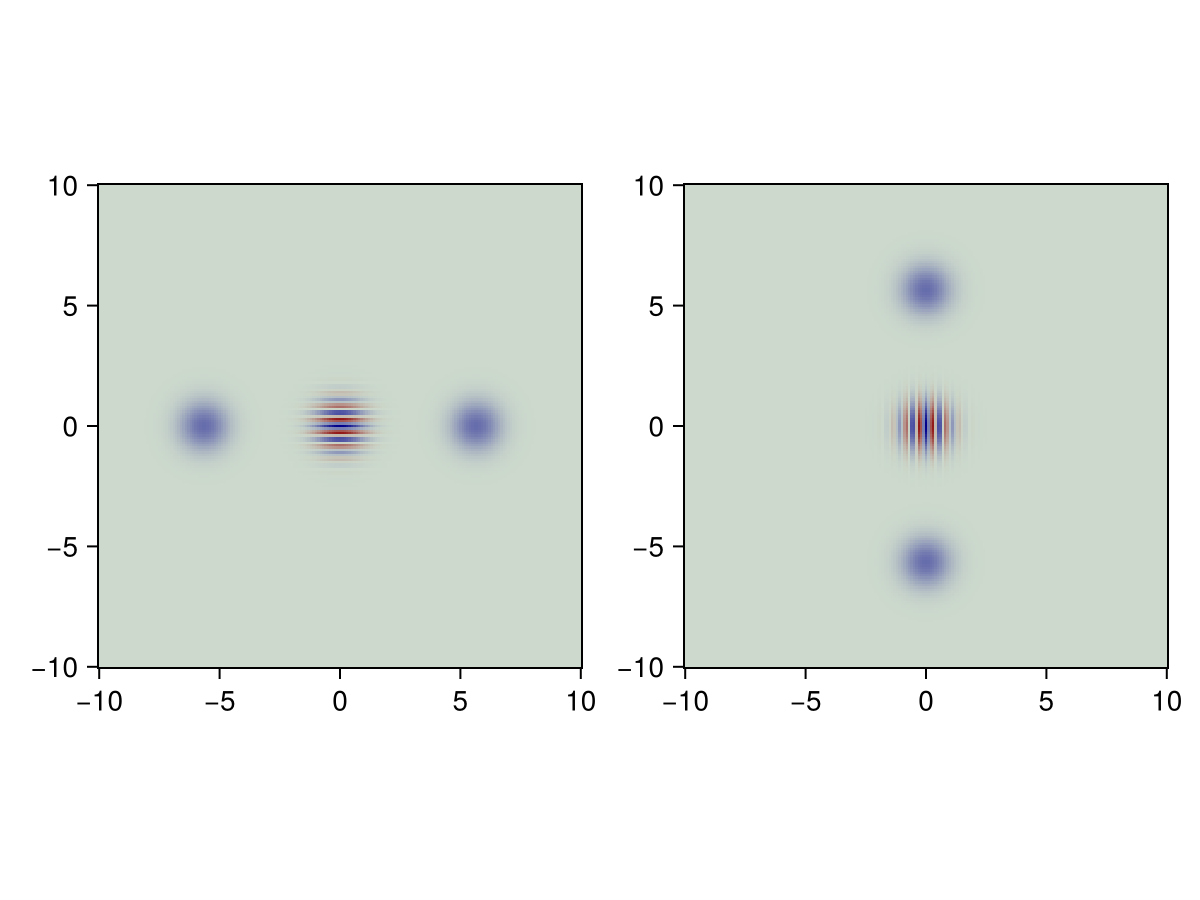

In [25]:
quads = -10:0.1:10

f = Figure()
Axis(f[1,1], aspect=DataAspect())
w = wigner(l0, quads, quads)
m = maximum(abs.(w))
heatmap!(quads, quads, w, colormap=:redsblues, colorrange=(-m,m))
Axis(f[1,2], aspect=DataAspect())
w = wigner(l1, quads, quads)
m = maximum(abs.(w))
heatmap!(quads, quads, w, colormap=:redsblues, colorrange=(-m,m))
current_figure()

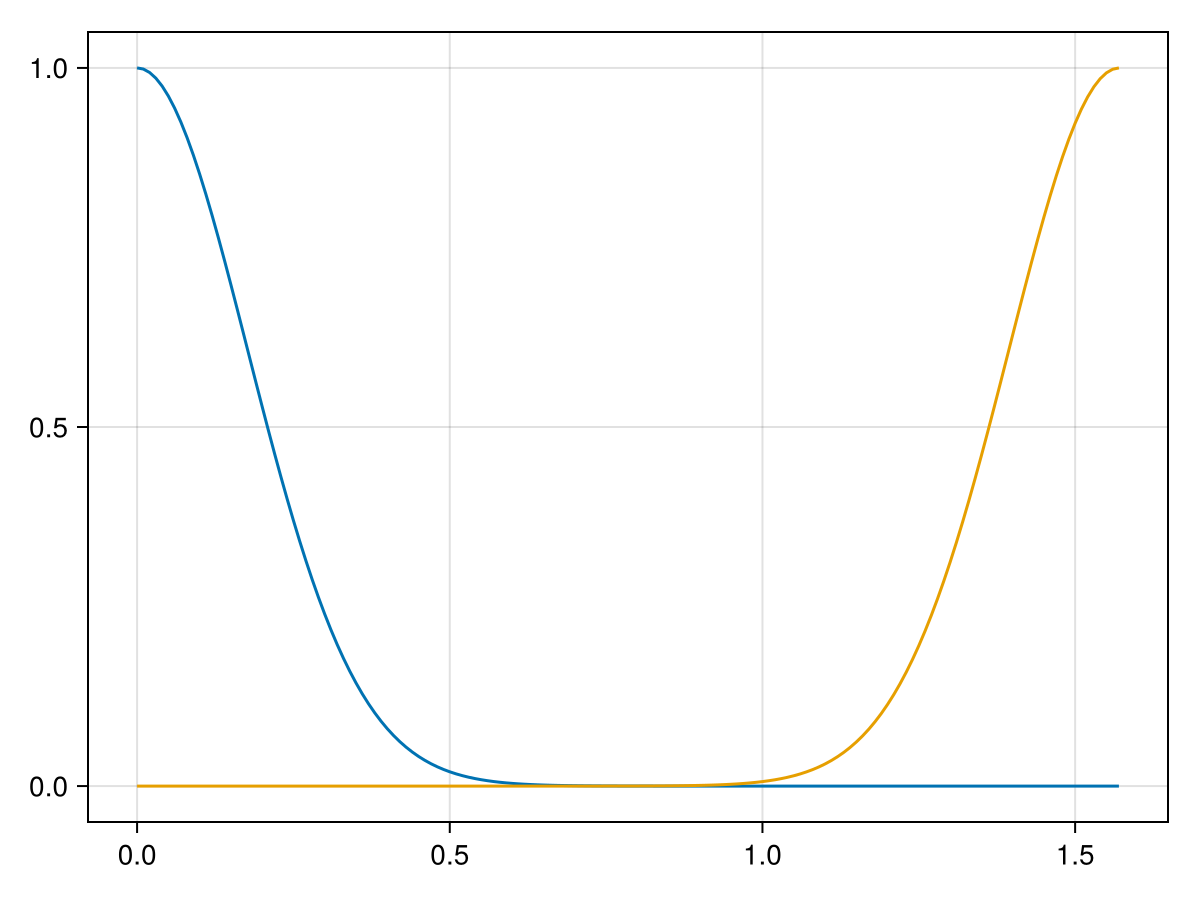

In [26]:
H = n
ts = 0:0.01:pi/2
_,ψs = timeevolution.schroedinger(ts,l0,H)

pl0 = projector(l0)
pl1 = projector(l1)

lines(ts, real.(expect.((pl0,),ψs)))
lines!(ts, real.(expect.((pl1,),ψs)))
current_figure()

Now with loss

  0.014022 seconds (865 allocations: 11.475 MiB)


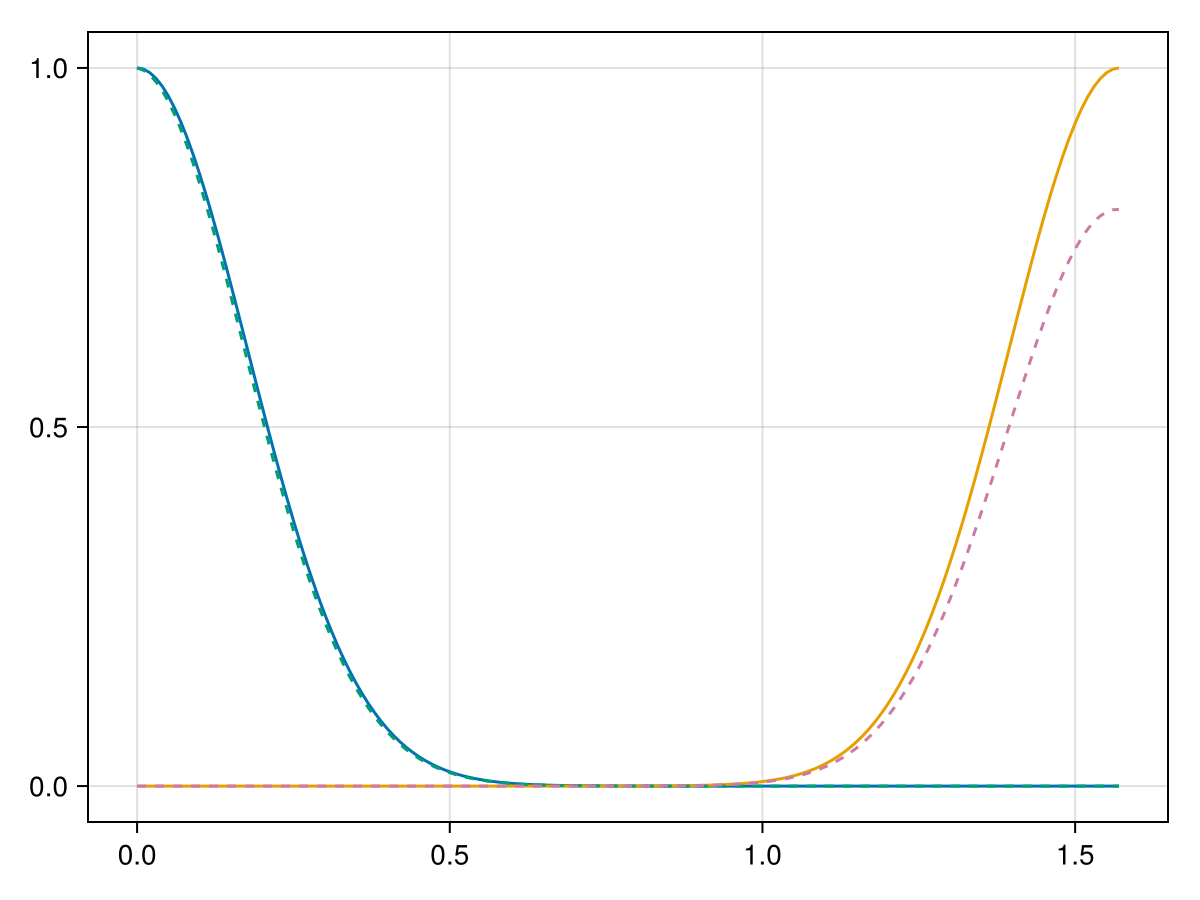

In [27]:
@time _,ρs = timeevolution.master(ts,l0,H,[√0.01 * a]);
lines!(ts, real.(expect.((pl0,),ρs)), linestyle=:dash)
lines!(ts, real.(expect.((pl1,),ρs)), linestyle=:dash)
current_figure()

And finally, with a non-hermitian Hamiltonian

  0.000494 seconds (615 allocations: 221.891 KiB)


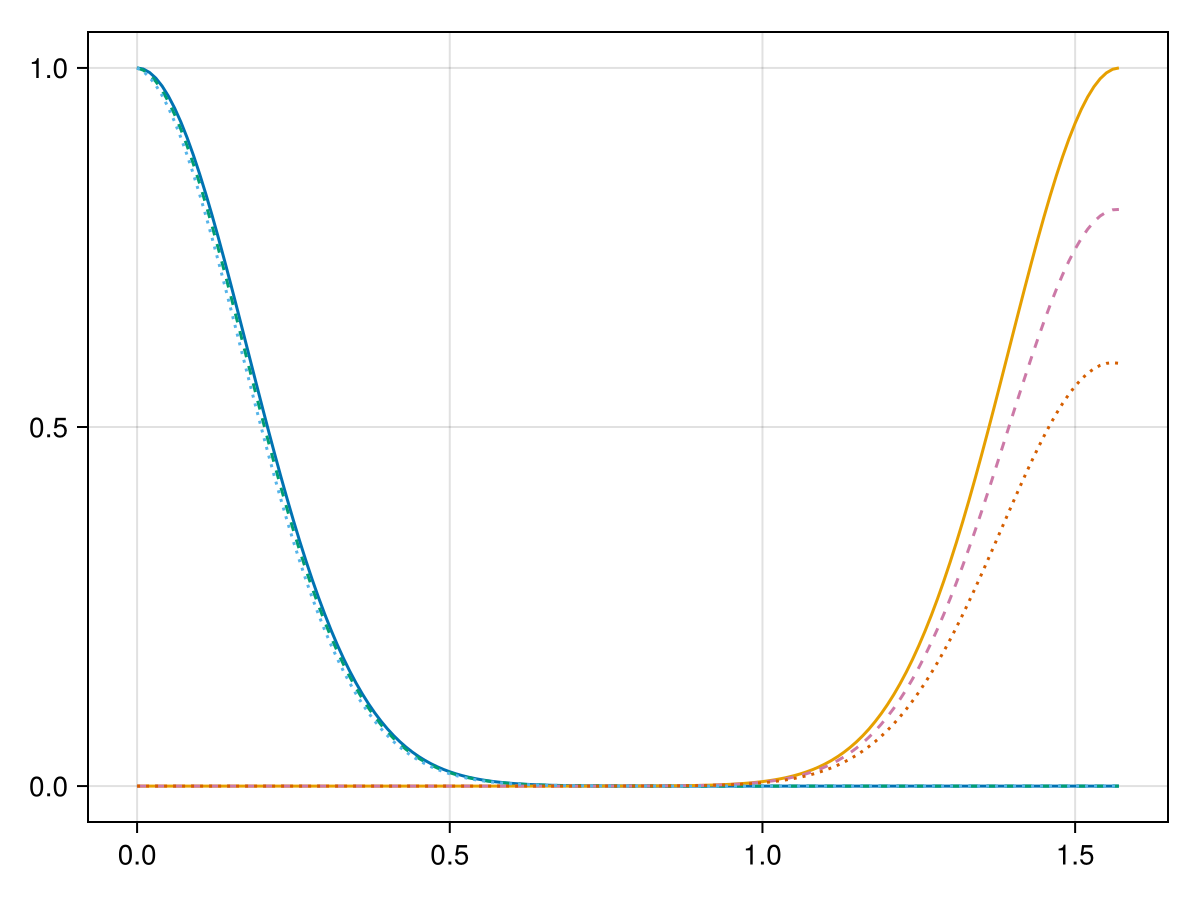

In [28]:
@time _,ψnhs = timeevolution.schroedinger(ts,l0,H - 0.01im * a * a');
lines!(ts, real.(expect.((pl0,),ψnhs)), linestyle=:dot)
lines!(ts, real.(expect.((pl1,),ψnhs)), linestyle=:dot)
current_figure()

TODO Nakajima Zwanzig solver

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*